In [68]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

## Importation du fichier Csv retour 

In [69]:
data=pd.read_csv('../base/retoursV2.csv',sep=';', encoding='utf-8')

In [70]:
data.head()

,id_commande,id_produit,date_retour,motif
0,O026807,P00184,2024-09-12,Client insatisfait
1,O008302,P00063,2024-12-15,Livraison incomplète
2,O045235,P00158,2024-04-12,Livraison incomplète
3,O001001,P00136,2024-11-18,Livraison incomplète
4,O005871,P00258,2024-11-29,Mauvaise référence


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2987 entries, 0 to 2986
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_commande  2987 non-null   object
 1   id_produit   2987 non-null   object
 2   date_retour  2987 non-null   object
 3   motif        2987 non-null   object
dtypes: object(4)
memory usage: 93.5+ KB


## Convertir la date de Object a Date Time 


In [72]:
data['date_retour'] = pd.to_datetime(data['date_retour'], errors='coerce')


In [73]:
data['date_retour'].dtype  # doit afficher datetime64[ns]

dtype('<M8[ns]')

## Vérification des valeurs nulles 

In [74]:
data.isnull().sum()

id_commande    0
id_produit     0
date_retour    0
motif          0
dtype: int64

In [75]:
data.duplicated().sum()

np.int64(0)

In [76]:
data.describe(include='all')


,id_commande,id_produit,date_retour,motif
count,2987,2987,2987,2987
unique,2933,358,NaN,4
top,O035867,P00379,NaN,Client insatisfait
freq,2,30,NaN,776
mean,NaN,NaN,2024-08-27 00:20:14.864412672,NaN
min,NaN,NaN,2024-01-08 00:00:00,NaN
25%,NaN,NaN,2024-04-16 00:00:00,NaN
50%,NaN,NaN,2024-10-14 00:00:00,NaN
75%,NaN,NaN,2024-12-18 00:00:00,NaN
max,NaN,NaN,2025-01-29 00:00:00,NaN


# Visualisations 

## Analyse des motifs de retours 

#### 🎯 Objectif :
Ce graphique a pour but d’identifier les **raisons les plus fréquentes de retour produit**.  
Comprendre les **motifs de retour** permet de :
- Détecter les **points faibles du parcours client** (qualité, logistique, communication…)
- Prioriser les actions à mettre en place pour **réduire le taux de retour**


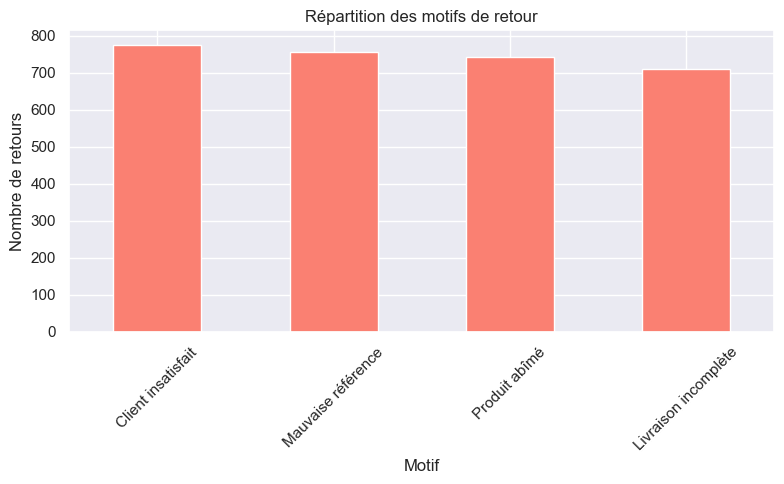

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Répartition des motifs de retour
plt.figure(figsize=(8, 5))
data['motif'].value_counts().plot(kind='bar', color='salmon')
plt.title("Répartition des motifs de retour")
plt.xlabel("Motif")
plt.ylabel("Nombre de retours")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🔹 Analyse des motifs de retour

Ce graphique met en évidence la répartition des **principaux motifs de retour** exprimés par les clients.

#### ✅ Observations :
📌 Le motif **"Client insatisfait"** arrive en tête, avec un **volume de retours notablement plus élevé** que les autres.

🆘 Suivent **"Mauvaise référence"** et **"Produit abîmé"**, aux volumes assez proches mais inférieurs.

🚚 **"Livraison incomplète"** est le **motif le moins fréquent**, mais reste significatif.

#### 🎯 Interprétation :
👉 Cette distribution suggère que les **problèmes liés à l’expérience client** sont à **prioriser dans les actions correctives**.  
Un travail sur la **communication produit**, les **fiches techniques**, et la **qualité du service client** pourrait contribuer à **réduire significativement ces retours**.

- Meilleure **préparation de commande**

## Top 10 des produits les plus retournés 
#### 🎯 Objectif :
Identifier les **produits les plus concernés par des retours**, afin de :
- Détecter des **anomalies produit récurrentes**
- Prioriser les **améliorations qualité ou logistiques**
- Évaluer l’impact potentiel sur la satisfaction client

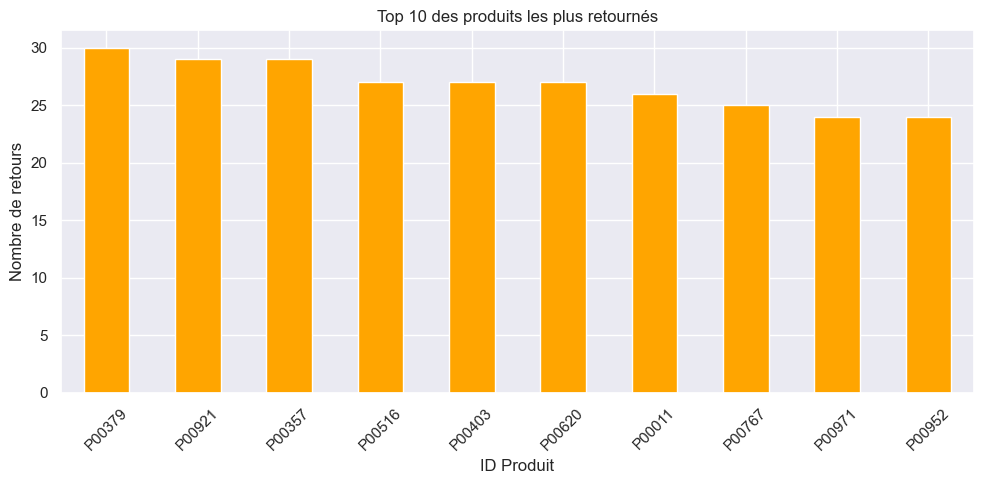

In [78]:
import matplotlib.pyplot as plt

# 📦 Top 10 des produits les plus retournés
plt.figure(figsize=(10, 5))
data['id_produit'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 des produits les plus retournés")
plt.xlabel("ID Produit")
plt.ylabel("Nombre de retours")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🔹 Produits les plus retournés

Ce graphique affiche les **10 produits les plus fréquemment retournés**.

#### ✅ Observations :
📌 Le produit **`P00379`** est **le plus retourné**, suivi de près par **`P00921`**, **`P00357`**, et **`P00516`**.

📊 Tous les produits listés ont été retournés **au moins 24 fois**, ce qui représente un **volume significatif** à surveiller.

👉 Ces produits pourraient être affectés par :
- Un **défaut de qualité** ou de **conception**
- Une **mauvaise adéquation avec les attentes clients**
- Des **problèmes logistiques** ou **d'information produit**

🎯 Une **enquête spécifique** sur ces produits pourrait permettre de **réduire significativement les retours** futurs et d'améliorer la **satisfaction client**.


## Nombre de retours par mois 
#### 🎯 Objectif :
Analyser l’**évolution des retours au fil du temps** afin de :
- Identifier des **périodes critiques** (pics ou creux)
- Anticiper les moments où le **service après-vente** est le plus sollicité
- Croiser plus tard avec les périodes de forte activité commerciale

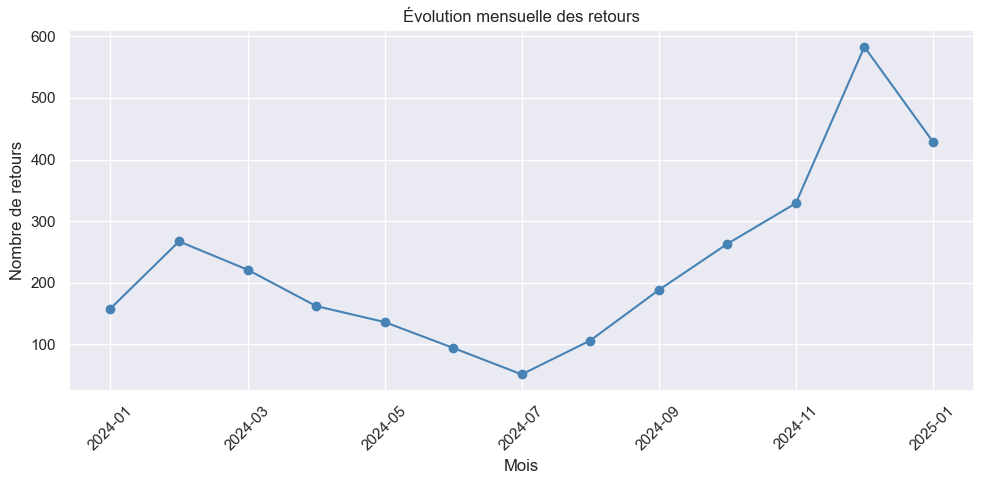

In [79]:
# 📆 Extraire le mois au format AAAA-MM
data['mois'] = data['date_retour'].dt.to_period('M').astype(str)

# 📊 Comptage des retours par mois
retours_mensuels = data['mois'].value_counts().sort_index()

# 📈 Affichage du graphe
plt.figure(figsize=(10, 5))
retours_mensuels.plot(kind='line', marker='o', color='steelblue')
plt.title("Évolution mensuelle des retours")
plt.xlabel("Mois")
plt.ylabel("Nombre de retours")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


### 🔹 Évolution mensuelle des retours

Ce graphique permet de visualiser le **nombre de retours de produits par mois**, sur toute la période observée.

#### ✅ Observations :
- 📉 Le volume de retours est relativement **faible et stable entre mai et août**, avec un **creux en juillet**.
- 📈 Une **hausse progressive** débute dès septembre.
- 🚀 **Décembre** enregistre un **pic majeur** des retours, suivi d’un repli en janvier.

#### 🎯 Interprétation :
👉 Ce comportement suggère une **influence saisonnière** ou **comportementale** :
- Le pic de décembre peut refléter une **période d’achats massifs** (fêtes de fin d’année), suivie de retours post-fêtes.
- Le calme estival pourrait être lié à une **baisse d’activité en période de vacances**.

📌 Cette tendance peut aider à :
- **Anticiper les ressources SAV/logistique**
- **Renforcer la qualité des produits et descriptions** en période de forte activité
- Adapter la **politique de retour** selon les périodes stratégiques


## Repartition mensuelle des motifs de retours

### 📊 Objectif
L’objectif de cette visualisation est de suivre l’**évolution mensuelle des différents motifs de retour** afin de :
- Identifier les **périodes critiques** où certains problèmes sont plus fréquents.
- Comprendre **quels types de dysfonctionnements** apparaissent selon les saisons ou les pics d’activité.
- Aider à mettre en place des **actions ciblées** pour réduire les retours sur les motifs les plus problématiques.


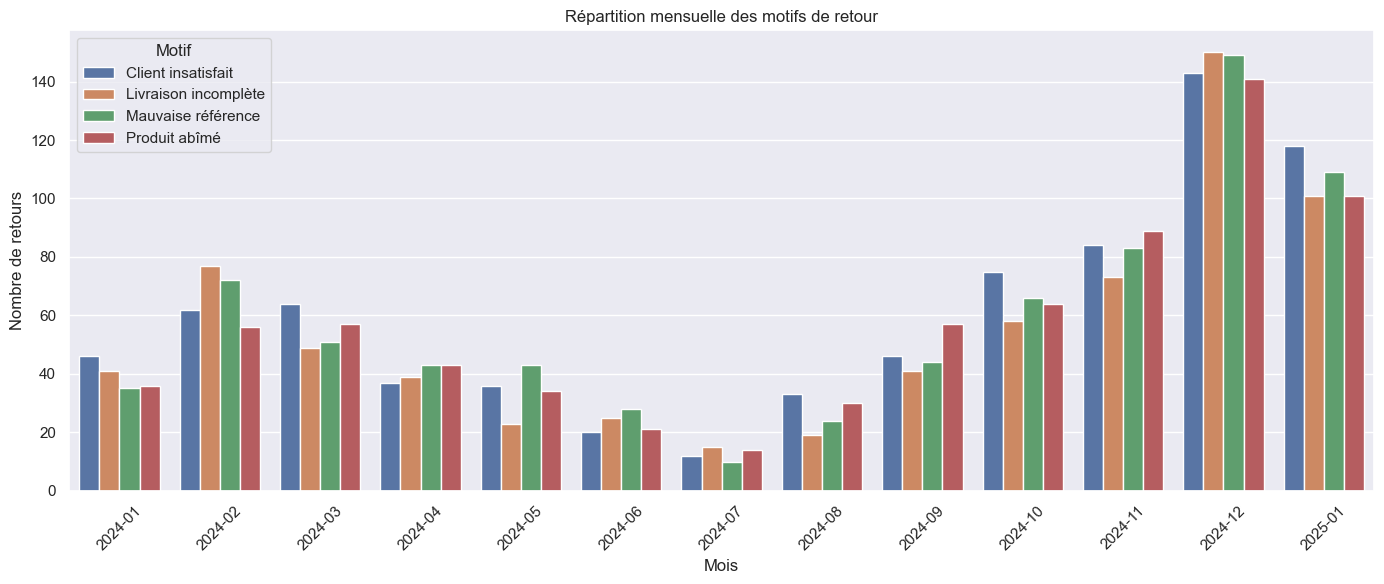

In [80]:
# 📆 Extraire le mois depuis la date de retour
data['mois'] = data['date_retour'].dt.to_period('M').astype(str)

# 📊 Création d'une table croisée mois x motif
retours_par_motif = data.groupby(['mois', 'motif']).size().reset_index(name='nb_retours')

# 📈 Affichage en barres empilées (stacked bar plot)
plt.figure(figsize=(14, 6))
sns.barplot(data=retours_par_motif, x='mois', y='nb_retours', hue='motif')

plt.title("Répartition mensuelle des motifs de retour")
plt.xlabel("Mois")
plt.ylabel("Nombre de retours")
plt.xticks(rotation=45)
plt.legend(title="Motif")
plt.tight_layout()
plt.show()

### 🔹 Répartition mensuelle des motifs de retour

Ce graphique met en évidence l’évolution **des différents motifs de retour** au fil des mois.

#### ✅ Observations :
- 📈 Tous les motifs connaissent une **hausse marquée en fin d’année**, notamment en **décembre**, mois le plus critique.
- 📌 Le motif **"Client insatisfait"** reste **constant et souvent prédominant** tout au long de l’année.
- 🔁 Les motifs **"Mauvaise référence"** et **"Produit abîmé"** présentent des tendances **parallèles**, mais avec des variations selon les périodes.
- 🚚 **"Livraison incomplète"** fluctue davantage, avec un pic en **février** et à la **fin de l’année**.

#### 🎯 Interprétation :
👉 Ces résultats suggèrent :
- Une pression accrue sur la chaîne logistique en fin d’année (🎁 fêtes, volume élevé, fatigue opérationnelle).
- Une nécessité d’**améliorer la satisfaction client**, notamment en période de pic.
- Un intérêt pour un **suivi régulier des motifs** afin d’adapter les actions correctives par trimestre.


In [83]:
data.to_csv("retours_cleaned_final.csv", index=False, encoding='utf-8')
